![AES Masthead](https://kyrill.ias.sdsmt.edu/wjc/eduresources/AES_Masthead.png)
# Fisher's z-Test Text and Graphics Function

## License






## Libraries

Let's start with our analog for R to do this task.

* [numpy](https://numpy.org/doc/stable/reference/generated/numpy.nansum.html): The Go-To Python Library for Arrays and Basic Math Operation
* [scipy](https://docs.scipy.org/doc/scipy/index.html): An open-source software for mathematics, science, and engineering
* [matplotlib](https://matplotlib.org/): The standard library for basic plotting in Python
* [seaborn](https://seaborn.pydata.org/index.html): An extention for Matplotlib that leverages Pandas (but you can use it with other datamodels).


---
## Welch's t-Test Function Declaration

In [1]:
    import numpy             as np
    import matplotlib.pyplot as plt
    import seaborn           as sns    
    import scipy.stats       as stats


In [2]:
#########################################
#
# Welch's t-Test Text and Graphics Function
#

def Fishers_z_Test(x1 =        None,
                   y1 =        None,
                   x2 =        None,
                   y2 =        None,
                 test = "two-sided",
               name_x =         "x",
               name_y =         "y",
               case_1 =        "Case₁",
               case_2 =        "Case₂",
                alpha =        0.05):
    """
    Applies a Fisher's z-Test to two samples with tablular and graphical output

    Author: WJ Capehart, South Dakota Mines.

    Licensing: Creative Commons BY-NC-SA version 4.0
       (https://creativecommons.org/licenses/by-nc-sa/4.0/)

    Citation: 

    "Fisher's z-Test(): A basic Fisher's z-Test Utility Function 
        including textual and graphical output" by William J Capehart 
        is licensed under Creative Commons Attribution-NonCommercial-
        ShareAlike 4.0 
         

    Args:
        x1 (array): Experimental Independent Sample
        y1 (array): Experimental Independent Sample
        x2 (array): Control Dependent Sample
        y2 (array): Control Dependent Sample
        test (string): t-test: ["two-sided","greater","less"]
        name_x (string): Independent Text Name for Variable
        name_y (string): Dependent Text Name for Variable
        case_1 (string): Experimental Sample Name
        case_2 (string): Control Sample Name
        alpha (float): Experimental Sample
        
    Returns:
        z_stat (float): Calculated t-statistic 
        p (float): p-value
        df (int): degrees of freedom
        Verdict (string): Hypothesis Result
    """

    
    
    #
    # Libraries
    #

    import numpy             as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn           as sns    
    import scipy.stats       as stats

    #
    # Calculate Fisher's z-Statisic
    #

    r1 = stats.pearsonr(x1,y1).statistic
    r2 = stats.pearsonr(x2,y2).statistic
    
    n1 = x1.size
    n2 = x2.size

    z_stat = ( np.arctanh(np.sqrt(r1))-np.arctanh(np.sqrt(r2)) ) / \
                    np.sqrt(1./(n1-3) + 1./(n2-3))

    dataframe_1 = pd.DataFrame(data={name_x:x1, 
                                     name_y:y1,
                                     "Case":case_1})
    
    dataframe_2 = pd.DataFrame(data={name_x:x2, 
                                     name_y:y2,
                                     "Case":case_2})


    dataframe = pd.concat([dataframe_1, dataframe_2], axis=0)
    dataframe.reset_index(inplace=True)

    #
    # Test Language for Output
    #
    
    if (test == "greater"):
        Ho_sym, Ha_sym = ["≤", ">"]
        x1_fill        = "magenta"
        x2_fill        = "cyan"
        x1_line        = "darkred"
        x2_line        = "darkblue"
        t_color        = "blue"
    elif (test == "less"):
        Ho_sym, Ha_sym = ["≥", "<"]   
        x1_fill        = "cyan"
        x2_fill        = "magenta"
        x1_line        = "darkblue"
        x2_line        = "darkred"
        t_color        = "blue"
    else:
        Ho_sym, Ha_sym = ["=", "≠"] 
        x1_fill        = "cyan"
        x2_fill        = "grey"
        x1_line        = "darkblue"
        x2_line        = "darkgray"
        t_color        = "green"
        
    Ho_Text = case_1 + " " + Ho_sym + " " + case_2
    Ha_Text = case_1 + " " + Ha_sym + " " + case_2
    
    #
    # Run z-Test
    #
    
    #
    # Output from T-Test
    #
    

    
    P_z_stat = stats.norm.cdf(x  = z_stat)
    
    #
    # Get Crit T-Thresholds, and calculated p vals s (<, >, two-tail)
    #
    
    if (test == "greater"):
        z_threshold = stats.norm.ppf(q =1 - alpha)
        p_calc      = 1-P_z_stat
        alpha_tail  = "{:02}".format(1-alpha)
    elif (test == "less"):
        z_threshold = stats.norm.ppf(q  =       alpha)  
        p_calc      = P_z_stat
        alpha_tail  = "{:02}".format(1-alpha)
    else:
        z_threshold = stats.norm.ppf(q  = 1 - alpha/2) 
        p_calc      = 2*(1-P_z_stat)
        alpha_high  = "{:03}".format(1-alpha/2)
        alpha_low   = "{:03}".format(alpha/2)
    
    #
    # Verdict of t-Test given alpha
    #
    
    if (p_calc > alpha):
        Verdict = "Ho cannot be rejected; " + Ho_Text
    else:
        Verdict = "Ho is rejected; " + Ha_Text
    
    
    #
    # Fisher z-Test Report
    #

    print("")
    print("╔═══════════════════════════════════════════════════")
    print("║╭──────────────────────────────────────────────")
    print("║│  Fisher's z-Test Report (ɑ="+str(alpha)+")")
    print("║│    x :", name_x, ";  y:", name_y)
    print("║│       Ho :", Ho_Text)
    print("║│       Ha :", Ha_Text)
    print("║│        z :", z_stat)
    if (test != "two-sided"):
        print("║│   z₍₁₋ₐ₎ :", z_threshold)
    else:
        print("║│  z₍₁₋½ₐ₎ :", z_threshold)
    print("║│        p :", p_calc )
    print("║│   Result :", Verdict  ) 
    print("║╰──────────────────────────────────────────────")
    
    #
    # Calucate p(t) for Graphics
    #
    
    p_z_stat = stats.norm.pdf(x  = z_stat)
    
    
    #
    # X-Axis for z-Values for Plots
    #
    
    z_plotedge  = stats.norm.ppf(q  = 0.99999)
    
    z_plotedge_max = np.max([z_plotedge,
                                 z_stat])
    
    z_plotedge_min = np.min([-z_plotedge,
                                  z_stat])
    
    z_axis_plot_range = np.linspace(start =  z_plotedge_min,
                                     stop =  z_plotedge_max,
                                     num  =            1000)
    
    #
    # Plot z-Curve
    #

    sns.set_theme(style = "ticks", 
          rc    = {"axes.spines.right":False, 
                     "axes.spines.top":False})
    
    fig, [ax1, ax2] = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = [8,3])
    
    fig.suptitle("Fisher's z-Test : "+ name_y + " vs " + name_x,fontsize="small")
    

    #
    # Plot x1 and x2
    #

    sns.regplot(x=x1, y=y1,
                ax          =     ax1,color = x1_line,
                   label=case_1)
    sns.regplot(x=x2, y=y2, 
                ax          =     ax1,color = x2_line,
                   label=case_2)
    ax1.legend(framealpha = 0,      # makes legend transparent
                fontsize = "xx-small") 
    ax1.set_xlabel(name_x, fontsize="x-small")
    ax1.set_ylabel(name_y, fontsize="x-small")
    ax1.set_title("Linear Regressions", fontsize="x-small")   

    #
    # Plot t-Distribution
    #

    if (p_calc > alpha):
        ax2.set_title(r"$H_0$: " + Ho_Text, fontsize="x-small")
    else:
        ax2.set_title(r"$H_a$: " + Ha_Text, fontsize="x-small")
    
    
    ax2.plot(z_axis_plot_range, 
             stats.norm.pdf(x  = z_axis_plot_range), 
             color = "grey",
             label = r"$p(z)$")
    
    if (test == "greater"):
        z_axis_greater = np.linspace(start = z_plotedge_min,
                                      stop =    z_threshold,
                                       num =           1000)
        ax2.fill_between(z_axis_greater, 
                         stats.norm.pdf(x  = z_axis_greater), 
                         color = t_color,
                         alpha = 0.33333,
                         label = r"$P(z)$ = "+alpha_tail)
    
    elif (test == "less"):
        z_axis_less = np.linspace(start =    z_threshold,
                                   stop = z_plotedge_max,
                                    num =           1000)
        ax2.fill_between(z_axis_less, 
                         stats.norm.pdf(x  = z_axis_less), 
                         alpha = 0.33333,
                         color = t_color,
                         label = r"1-$P(z)$ = "+alpha_tail)
    
    else:
        z_axis_2tail = np.linspace(start = -z_threshold,
                                    stop =  z_threshold,
                                     num =         1000)
        ax2.fill_between(z_axis_2tail, 
                         stats.norm.pdf(x  = z_axis_2tail), 
                         alpha = 0.33333,
                         color = t_color,
                         label = alpha_low+" > P(z) > "+alpha_high)
    
    ax2.plot([z_stat,   z_stat],
             [    -1, p_z_stat],
             marker    = "o",
             color     = "red",
             label     = r"Fisher's $z$ value",
             linestyle = "dotted")
    
    ax2.legend(framealpha = 0,      # makes legend transparent
                 fontsize = "xx-small") 
    
    ax2.set_ylim(bottom = 0)
    ax2.set_xlabel(r"$z$",    fontsize="x-small")
    ax2.set_ylabel(r"$p(z)$", fontsize="x-small")


    ax1.tick_params(labelsize = "x-small")
    ax2.tick_params(labelsize = "x-small")

    
    plt.tight_layout
    plt.show()
   
    print("╚═══════════════════════════════════════════════════")
    print("")

    return {"z": z_stat,
            "p": p_calc,
       "Result": Verdict}
#
#########################################

---
## Testing Example

This test leverages a dataset compiled by

> De Vito, S., E. Massera, M. Piga, L. Martinotto, G. Di Francia, 2008: On  field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, *Sensors and Actuators B: Chemical*, **129** (2), 750-757, [doi: 10.1016/j.snb.2007.09.060](https://www.sciencedirect.com/science/article/abs/pii/S0925400507007691).

The dataset is maintained by the Univ of California at Irvine, Machine Learning Repository ([doi: 10.24432/C59K5F](https://doi.org/10.24432/C59K5F))

Here, the data is extracted for two Benzine samples (a training sample with 70 samples and a testing sample of 30 samples) at 0700 UTC between 2004-March-11 and 2005-April-04.

### Support Libraries for Demonstration

* [numpy](https://numpy.org/doc/stable/reference/generated/numpy.nansum.html): The Go-To Python Library for Arrays and Basic Math Operation
* [pandas](https://pandas.pydata.org/docs/): Our Go-To Library for Tabular Data.

In [3]:
#########################################
#
# Demonstration Libraries
#

import pandas as pd

#
#########################################

In [4]:
#########################################
#
# Demonstration Libraries
#

url_xlsx = "http://kyrill.ias.sdsmt.edu:8080/thredds/fileServer/CLASS_Examples/CEE_284_Area/Statistics/Air_Quality_Extraction_H0700.xlsx"

training = pd.read_excel(io         = url_xlsx,
                         sheet_name = "Training").  \
              set_index("Time")

testing  = pd.read_excel(io         = url_xlsx,
                         sheet_name = "Testing").  \
              set_index("Time")

display(training)
display(testing)
#
#########################################

,Sample,Month,Hour,C6H6 (μg/m³),CO (mg/m³),NOx (ppb),NO2 (μg/m³),T (° C),RH (%),AH (g/kg)
Time,,,,,,,,,,
2004-04-07 07:00:00,Train,Apr,7,12.935403,2.8,152.0,111.0,14.300,58.175,0.943075
2004-04-12 07:00:00,Train,Apr,7,0.945425,0.5,39.0,53.0,13.475,50.100,0.770567
2004-04-13 07:00:00,Train,Apr,7,19.123453,3.9,328.0,130.0,10.975,64.150,0.839760
2004-05-02 07:00:00,Train,May,7,4.755590,0.8,48.0,46.0,14.300,66.175,1.072763
2004-05-04 07:00:00,Train,May,7,23.037221,4.5,302.0,109.0,16.550,78.000,1.457225
...,...,...,...,...,...,...,...,...,...,...
2005-03-03 07:00:00,Train,Mar,7,6.742318,1.4,262.8,135.5,2.850,75.575,0.574151
2005-03-04 07:00:00,Train,Mar,7,7.486889,1.9,408.9,138.7,3.125,77.300,0.598485
2005-03-05 07:00:00,Train,Mar,7,2.042536,0.8,167.5,132.2,4.625,54.575,0.468217


,Sample,Month,Hour,C6H6 (μg/m³),CO (mg/m³),NOx (ppb),NO2 (μg/m³),T (° C),RH (%),AH (g/kg)
Time,,,,,,,,,,
2004-04-06 07:00:00,Test,Apr,7,24.134258,4.5,329.0,134.0,15.300,55.225,0.953788
2004-04-27 07:00:00,Test,Apr,7,23.419668,4.1,314.0,122.0,15.900,48.525,0.870351
2004-05-01 07:00:00,Test,May,7,6.451626,1.2,75.0,67.0,16.875,66.550,1.268826
2004-05-03 07:00:00,Test,May,7,21.128692,3.4,283.0,101.0,16.825,62.450,1.186945
2004-05-07 07:00:00,Test,May,7,19.779412,3.7,214.0,106.0,14.900,56.900,0.958184
2004-05-14 07:00:00,Test,May,7,22.780588,3.7,272.0,140.0,18.475,49.375,1.039693
2004-05-15 07:00:00,Test,May,7,9.061727,1.4,106.0,68.0,16.025,47.375,0.856424
2004-05-20 07:00:00,Test,May,7,19.618987,2.8,188.0,97.0,16.600,55.950,1.048554
2004-06-08 07:00:00,Test,Jun,7,19.370545,3.3,309.0,100.0,19.525,57.725,1.296638


In [5]:
x1 =  testing["CO (mg/m³)"].values
x2 = training["CO (mg/m³)"].values

y1 =  testing["C6H6 (μg/m³)"].values
y2 = training["C6H6 (μg/m³)"].values

case_1 = "Testing"
case_2 = "Training"

name_x = "CO"
name_y = "C6H6"

## Executing the Function

Here we will demonstrate all three basic statistical tests, challenging the Testing sample against the Training sample.


╔═══════════════════════════════════════════════════
║╭──────────────────────────────────────────────
║│  Fisher's z-Test Report (ɑ=0.05)
║│    x : CO ;  y: C6H6
║│       Ho : Testing = Training
║│       Ha : Testing ≠ Training
║│        z : -0.46361054132821816
║│  z₍₁₋½ₐ₎ : 1.959963984540054
║│        p : 1.3570731994141858
║│   Result : Ho cannot be rejected; Testing = Training
║╰──────────────────────────────────────────────


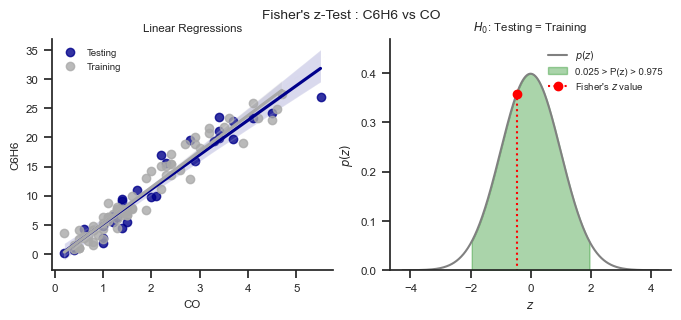

╚═══════════════════════════════════════════════════

Two-Tail Function Output


{'z': -0.46361054132821816,
 'p': 1.3570731994141858,
 'Result': 'Ho cannot be rejected; Testing = Training'}




╔═══════════════════════════════════════════════════
║╭──────────────────────────────────────────────
║│  Fisher's z-Test Report (ɑ=0.05)
║│    x : CO ;  y: C6H6
║│       Ho : Testing ≤ Training
║│       Ha : Testing > Training
║│        z : -0.46361054132821816
║│   z₍₁₋ₐ₎ : 1.644853626951472
║│        p : 0.6785365997070929
║│   Result : Ho cannot be rejected; Testing ≤ Training
║╰──────────────────────────────────────────────


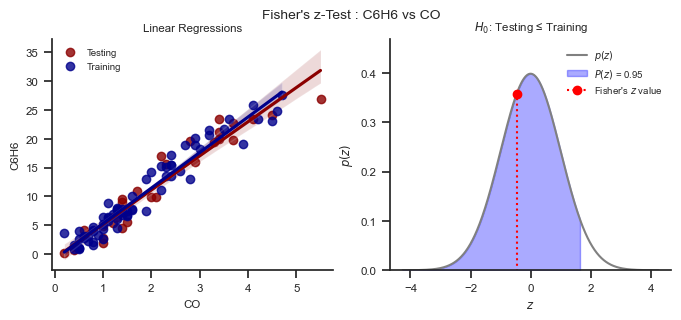

╚═══════════════════════════════════════════════════

Right-Tail Function Output


{'z': -0.46361054132821816,
 'p': 0.6785365997070929,
 'Result': 'Ho cannot be rejected; Testing ≤ Training'}




╔═══════════════════════════════════════════════════
║╭──────────────────────────────────────────────
║│  Fisher's z-Test Report (ɑ=0.05)
║│    x : CO ;  y: C6H6
║│       Ho : Testing ≥ Training
║│       Ha : Testing < Training
║│        z : -0.46361054132821816
║│   z₍₁₋ₐ₎ : -1.6448536269514729
║│        p : 0.3214634002929071
║│   Result : Ho cannot be rejected; Testing ≥ Training
║╰──────────────────────────────────────────────


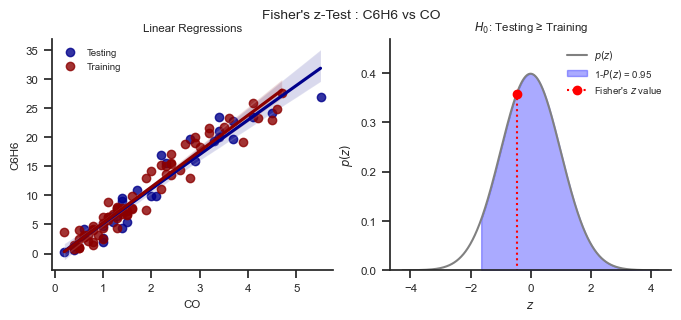

╚═══════════════════════════════════════════════════

Left-Tail Function Output


{'z': -0.46361054132821816,
 'p': 0.3214634002929071,
 'Result': 'Ho cannot be rejected; Testing ≥ Training'}

In [6]:
#########################################
#
# Demonstration of Function
#

#
# Two-Tail Function Output
#

z_test_Ha_Testing_ne_Training = \
    Fishers_z_Test(x1 =    testing[  "CO (mg/m³)"].values,
                   x2 =   training[  "CO (mg/m³)"].values,
                   y1 =    testing["C6H6 (μg/m³)"].values,
                   y2 =   training["C6H6 (μg/m³)"].values,
                 test =                       "two-sided",
               name_x =         "CO",
               name_y =         "C6H6",
               case_1 =         "Testing",
               case_2 =        "Training",
                alpha =                              0.05)

print("Two-Tail Function Output")
display(z_test_Ha_Testing_ne_Training)
print("")
print("")

#
# Right-Tail Function Output
#

z_test_Ha_Testing_gt_Training = \
    Fishers_z_Test(x1 =    testing[  "CO (mg/m³)"].values,
                   x2 =   training[  "CO (mg/m³)"].values,
                   y1 =    testing["C6H6 (μg/m³)"].values,
                   y2 =   training["C6H6 (μg/m³)"].values,
                 test =                         "greater",
               name_x =         "CO",
               name_y =         "C6H6",
               case_1 =         "Testing",
               case_2 =        "Training",
                alpha =                              0.05)

print("Right-Tail Function Output")
display(z_test_Ha_Testing_gt_Training)
print("")
print("")

#
# Left-Tail Function Output
#

z_test_Ha_Testing_lt_Training = \
    Fishers_z_Test(x1 =    testing[  "CO (mg/m³)"].values,
                   x2 =   training[  "CO (mg/m³)"].values,
                   y1 =    testing["C6H6 (μg/m³)"].values,
                   y2 =   training["C6H6 (μg/m³)"].values,
                 test =                         "less",
               name_x =         "CO",
               name_y =         "C6H6",
               case_1 =         "Testing",
               case_2 =        "Training",
                alpha = 0.05)

print("Left-Tail Function Output")
display(z_test_Ha_Testing_lt_Training)
print("")
print("")

#
#########################################


╔═══════════════════════════════════════════════════
║╭──────────────────────────────────────────────
║│  Fisher's z-Test Report (ɑ=0.05)
║│    x : NOx ;  y: C6H6
║│       Ho : Testing = Training
║│       Ha : Testing ≠ Training
║│        z : -0.29529489599943143
║│  z₍₁₋½ₐ₎ : 1.959963984540054
║│        p : 1.232231384819639
║│   Result : Ho cannot be rejected; Testing = Training
║╰──────────────────────────────────────────────


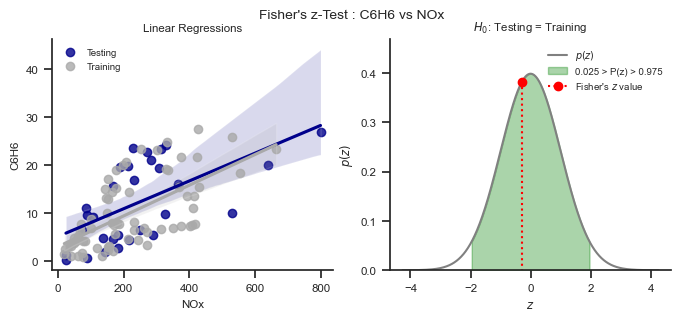

╚═══════════════════════════════════════════════════


╔═══════════════════════════════════════════════════
║╭──────────────────────────────────────────────
║│  Fisher's z-Test Report (ɑ=0.05)
║│    x : NO2 ;  y: C6H6
║│       Ho : Testing = Training
║│       Ha : Testing ≠ Training
║│        z : 0.2048728851095645
║│  z₍₁₋½ₐ₎ : 1.959963984540054
║│        p : 0.8376714404107972
║│   Result : Ho cannot be rejected; Testing = Training
║╰──────────────────────────────────────────────


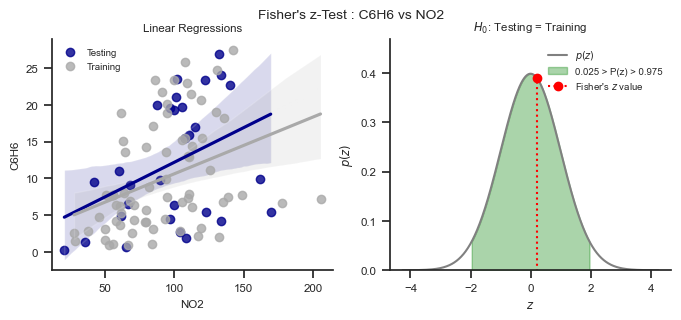

╚═══════════════════════════════════════════════════



{'z': -0.46361054132821816,
 'p': 0.3214634002929071,
 'Result': 'Ho cannot be rejected; Testing ≥ Training'}

In [7]:
#########################################
#
# Demonstration of Function
#

#
# Two-Tail Function Output
#

z_test_Ha_Testing_ne_Training = \
    Fishers_z_Test(x1 =    testing[   "NOx (ppb)"].values,
                   x2 =   training[   "NOx (ppb)"].values,
                   y1 =    testing["C6H6 (μg/m³)"].values,
                   y2 =   training["C6H6 (μg/m³)"].values,
                 test = "two-sided",
               name_x =         "NOx",
               name_y =         "C6H6",
               case_1 =         "Testing",
               case_2 =        "Training",
                alpha =                              0.05)


#
# Right-Tail Function Output
#

z_test_Ha_Testing_gt_Training = \
    Fishers_z_Test(x1 =    testing[ "NO2 (μg/m³)"].values,
                   x2 =   training[ "NO2 (μg/m³)"].values,
                   y1 =    testing["C6H6 (μg/m³)"].values,
                   y2 =   training["C6H6 (μg/m³)"].values,
                 test = "two-sided",
               name_x =         "NO2",
               name_y =         "C6H6",
               case_1 =         "Testing",
               case_2 =        "Training",
                alpha =                              0.05)

display(z_test_Ha_Testing_lt_Training)
print("")
print("")

#
#########################################

---
## Version Information

* [version_information](https://github.com/jrjohansson/version_information): Robert Johansson's Version Information Utility
  

In [8]:
#########################################
#
# Version Information Utility
#

%load_ext version_information

%version_information numpy, scipy, matplotlib, pandas, version_information

#
#########################################

Software versions
Python 3.12.8 64bit [Clang 18.1.8 ]
IPython 9.0.2
OS macOS 15.3.1 arm64 arm 64bit
numpy 1.26.4
scipy 1.15.2
matplotlib 3.9.4
pandas 2.2.3
version_information 1.0.4
Thu Mar 13 08:56:51 2025 MDT